#### 차원 축소

##### PCA

In [1]:
# Iris data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# scaling
from sklearn.preprocessing import StandardScaler
iris_std = StandardScaler().fit_transform(load_iris().data)

In [3]:
# Numpy로 구하기- 공분산 행렬
iris_cov = np.dot(iris_std.T, iris_std) / (len(iris_std) - 1)
iris_cov

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [4]:
np.cov(iris_std.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [5]:
# 고유벡터, 고유값
eig_vals, eig_vecs = np.linalg.eig(iris_cov)

In [6]:
eig_vals, eig_vecs

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

In [7]:
# 주성분: PC1
PC1 = np.dot(iris_std,eig_vecs.T[0].reshape(-1,1))
# PC1 = np.dot(iris_std,eig_vecs[:,:1])
PC1[:5]

array([[-2.26470281],
       [-2.08096115],
       [-2.36422905],
       [-2.29938422],
       [-2.38984217]])

In [8]:
# 주성분: PC2
PC2 = np.dot(iris_std,eig_vecs[:,1:2])
PC2[:5]

array([[-0.4800266 ],
       [ 0.67413356],
       [ 0.34190802],
       [ 0.59739451],
       [-0.64683538]])

In [9]:
iris_PCA = pd.DataFrame({
    'PC1':PC1.flatten(), 'PC2':PC2.flatten(), 'species':load_iris().target
})
iris_PCA.head()

,PC1,PC2,species
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0


In [10]:
iris_df = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
iris_df['PC1'] = PC1.flatten()
iris_df['PC2'] = PC2.flatten()
iris_df['species'] = load_iris().target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),PC1,PC2,species
0,5.1,3.5,1.4,0.2,-2.264703,-0.480027,0
1,4.9,3.0,1.4,0.2,-2.080961,0.674134,0
2,4.7,3.2,1.3,0.2,-2.364229,0.341908,0
3,4.6,3.1,1.5,0.2,-2.299384,0.597395,0
4,5.0,3.6,1.4,0.2,-2.389842,-0.646835,0


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

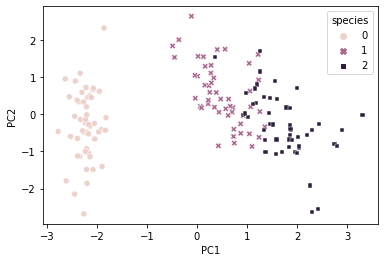

In [11]:
# PC1, PC2 시각화
sns.scatterplot(x='PC1',y='PC2',data=iris_df, hue='species', style='species')


In [12]:
# Scikit-learn로 구하기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [13]:
iris_pca = pca.fit_transform(iris_std)
iris_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [14]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),PC1,PC2,species
0,5.1,3.5,1.4,0.2,-2.264703,-0.480027,0
1,4.9,3.0,1.4,0.2,-2.080961,0.674134,0
2,4.7,3.2,1.3,0.2,-2.364229,0.341908,0
3,4.6,3.1,1.5,0.2,-2.299384,0.597395,0
4,5.0,3.6,1.4,0.2,-2.389842,-0.646835,0


In [15]:
# PCA 전후 비교
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [17]:
# 원본 데이터 분류
X_train, X_test, y_train, y_test = train_test_split(
    iris_std, load_iris().target, stratify=load_iris().target, random_state=2022
)

In [20]:
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9473684210526315

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_pca, load_iris().target, stratify=load_iris().target, random_state=2022
)

In [22]:
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9210526315789473

In [24]:
# Wine data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)

In [26]:
# 2차원축소
from sklearn.decomposition import PCA
pca2 = PCA(2)
wine_pca2 = pca2.fit_transform(wine_std)
wine_pca2[:3]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ]])

In [27]:
pca2.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [28]:
pca4 = PCA(4)
wine_pca4 = pca4.fit_transform(wine_std)
wine_pca4[:3]

array([[ 3.31675081, -1.44346263, -0.16573904, -0.21563119],
       [ 2.20946492,  0.33339289, -2.02645737, -0.29135832],
       [ 2.51674015, -1.0311513 ,  0.98281867,  0.72490231]])

In [29]:
pca4.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ])

In [30]:
pca6 = PCA(6)
wine_pca6 = pca6.fit_transform(wine_std)
wine_pca6[:3]

array([[ 3.31675081, -1.44346263, -0.16573904, -0.21563119,  0.69304284,
        -0.22388013],
       [ 2.20946492,  0.33339289, -2.02645737, -0.29135832, -0.25765463,
        -0.92712024],
       [ 2.51674015, -1.0311513 ,  0.98281867,  0.72490231, -0.25103312,
         0.54927605]])

In [31]:
pca6.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823])

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    wine_std, wine.target, stratify=wine.target, random_state=2022
)
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train,y_train)
rfc.score(X_test, y_test)

1.0

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca2, wine.target, stratify=wine.target, random_state=2022
)
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train,y_train)
rfc.score(X_test, y_test)

1.0

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca4, wine.target, stratify=wine.target, random_state=2022
)
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train,y_train)
rfc.score(X_test, y_test)

1.0

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca6, wine.target, stratify=wine.target, random_state=2022
)
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train,y_train)
rfc.score(X_test, y_test)

1.0

In [38]:
df = pd.DataFrame(wine_pca2, columns=['PC1','PC2'])
df['target'] = wine.target

d:\edu\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

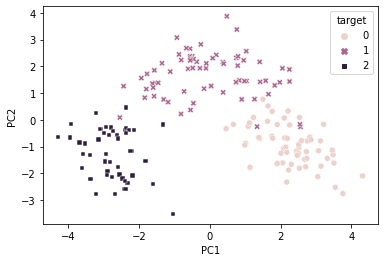

In [40]:
sns.scatterplot('PC1','PC2', data=df, hue='target', style='target')

In [42]:
def pca_accuraccy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=wine.target, random_state=2022
    )
    rfc = RandomForestClassifier(random_state=2022)
    rfc.fit(X_train,y_train)
    score = rfc.score(X_test, y_test)
    return score

In [45]:
for n in [2,4,6]:
    pca = PCA(n_components=n)
    wine_pca = pca.fit_transform(wine_std)
    explained = pca.explained_variance_ratio_.sum()
    acc = pca_accuraccy(wine_pca,wine.target)
    print(f'PCA{n}\n설명력: {explained:.4f}\n정확도: {acc:.4f}')

PCA2
설명력: 0.5541
정확도: 1.0000
PCA4
설명력: 0.7360
정확도: 1.0000
PCA6
설명력: 0.8510
정확도: 1.0000
